# TESTING THE MODEL W/ NEW TEST SAMPLES
______________________________________________________________________________________________________

### PART 1. QUICK DEBBUGING

In [1]:
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt


#defining image path
sample = "C:/Users/AKUMA/Desktop/DESKTOP/UNITY/Python Scripts/Dataset/mnist_png/testing/7/0.png"

#loading the model
model = tf.keras.models.load_model("C:/Users/AKUMA/Desktop/DESKTOP/UNITY/Python Scripts/mnist_digit_recog_cnn_2-conv-128-nodes-1-dense-17-04-2020_00-09_Ver16.h5")

#loading in grayscale digit from testing folder
loaded_sample = cv2.imread(sample, cv2.IMREAD_GRAYSCALE)

#reshape the image array to feed it into the model
processed_sample = loaded_sample.reshape(1,28,28,1)

#storing prediction
prediction = model.predict(processed_sample)

 # **--------- Prediction ---------**

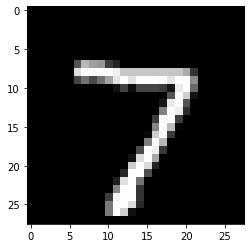

Prediction (Softmax) from the neural network:  [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]

Final Output: 7


In [2]:
##  output image
plt.imshow(loaded_sample.reshape(28, 28), cmap="gray")
plt.show()

##  softmax form prediction
print ("Prediction (Softmax) from the neural network: ", prediction)
print("\nFinal Output: {}".format(np.argmax(prediction)))

### NOTE:
*Here the model is doing great, it's able to predict what number is drawn on the input image.*

_______________________________________________________________________________________

## QUICK DEBUGGING PART 2.
#### Comparing model predictions with MNIST and Street view samples

In [3]:
#image pre processing

def preprocessing(image_path):
    
    #loading - convert to grayscale
    loaded_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    #resize
    resized_image = cv2.resize(loaded_image,(28,28))
    
    #reshape
    reshaped_image = resized_image.reshape(1,28,28,1)
    
    #show
    print("\n\n--------- preprocessed image ---------\n")
    plt.imshow(resized_image, cmap="gray")
    plt.show()
    
    print("type: ",type(reshaped_image))
    print("shape: ",reshaped_image.shape)
    
    prediction = model.predict(reshaped_image)
    print ("\n\nPrediction (Softmax) from the neural network: ", prediction)
    print("Final Output: {}".format(np.argmax(prediction))) #np.argmax return the indices of the maximum value
    
    return reshaped_image

 # **--------- Prediction ---------**



--------- preprocessed image ---------



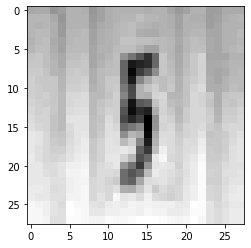

type:  <class 'numpy.ndarray'>
shape:  (1, 28, 28, 1)


Prediction (Softmax) from the neural network:  [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Final Output: 0


--------- preprocessed image ---------



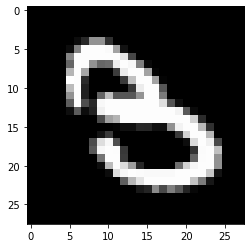

type:  <class 'numpy.ndarray'>
shape:  (1, 28, 28, 1)


Prediction (Softmax) from the neural network:  [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
Final Output: 3


In [4]:
StreetView_Sample = preprocessing("C:/Users/AKUMA/Desktop/DESKTOP/UNITY/Python Scripts/Dataset/StreetView Dataset/test/1.png")

MNIST_Sample = preprocessing("C:/Users/AKUMA/Desktop/DESKTOP/UNITY/Python Scripts/Dataset/mnist_png/testing/3/18.png")



### NOTE:
It seems that the model is not able to predict the digit from *The Street View House Numbers (SVHN)* Dataset. 

_______________________________________________________________________________________________

## PART. 3 Testing Yashvardhan Kukreja method from Medium


Found this article after some research, wich helped me to handle this problem: https://medium.com/@yash.kukreja.98/recognizing-handwritten-digits-in-real-life-images-using-cnn-3b48a9ae5e3 





----------------Original Image (Grayscaled)--------------------


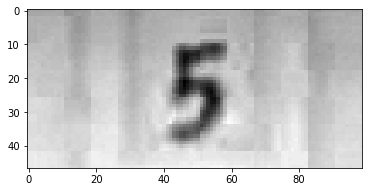




----------------Contoured Image--------------------


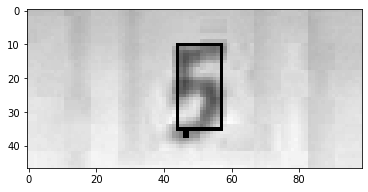




----------------Tresholding applied--------------------


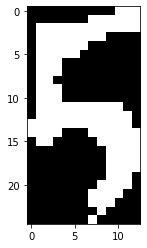




----------------Resized Image--------------------


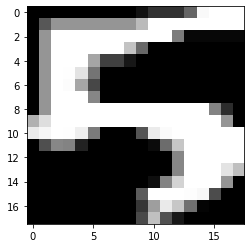




----------------Padded Image--------------------


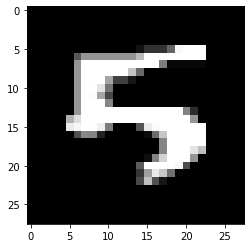



Prediction (Softmax) from the neural network:  [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
Final Output: 5


In [5]:

def predict_new_data(image_path):
    
    preprocessed_digits = []

    #loading - convert to grayscale
    loaded_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    print("\n\n\n----------------Original Image (Grayscaled)--------------------")
    plt.imshow(loaded_image, cmap="gray")
    plt.show()
       
    
    #applying threshold to a copy of the loaded image
    ret, thresh = cv2.threshold(loaded_image.copy(), 50, 255, cv2.THRESH_BINARY_INV)

    #applying contours around each object above the treshold ---> (need to do more research here)
    contours, _ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    
    
    for c in contours:
        x,y,w,h = cv2.boundingRect(c)

        # Creating a rectangle around the digit on the original image (for displaying the digits fetched via contours)
        cv2.rectangle(loaded_image, (x,y), (x+w, y+h), color=(0, 255, 0), thickness=1)
         
        # Cropping out the digit from the image corresponding to the current contours in the for loop
        digit = thresh[y:y+h, x:x+w]  
    
        # Resizing the digit to (18, 18)
        resized_digit = cv2.resize(digit, (18,18))      
    
        # Padding the digit with 5 pixels of black color (zeros) in each side to finally produce the image of (28, 28)
        padded_digit = np.pad(resized_digit, ((5,5),(5,5)), "constant", constant_values=0)

        # Adding the preprocessed digit to the list of preprocessed digits
        preprocessed_digits.append(padded_digit)
        
     
    
    #debug
    
    
        
    print("\n\n\n----------------Contoured Image--------------------")
    plt.imshow(loaded_image, cmap="gray")
    plt.show()

    print("\n\n\n----------------Tresholding applied--------------------")
    plt.imshow(digit, cmap="gray")
    plt.show()


    print("\n\n\n----------------Resized Image--------------------")
    plt.imshow(resized_digit, cmap="gray")
    plt.show()

    
    print("\n\n\n----------------Padded Image--------------------")
    plt.imshow(padded_digit, cmap="gray")
    plt.show()


    #make the prediction
    for digit in preprocessed_digits:
        prediction = model.predict(digit.reshape(1, 28, 28, 1))  
    
    print ("\n\nPrediction (Softmax) from the neural network: ", prediction)
    print("Final Output: {}".format(np.argmax(prediction))) #np.argmax return the indices of the maximum value

predict_new_data("C:/Users/AKUMA/Desktop/DESKTOP/UNITY/Python Scripts/Dataset/StreetView Dataset/test/1.png")

### DEBUG  NOTE:
<i>without adding coutours, tresholding and padding to the sample image, the model is not able to makes predictions. <br>
The Model was mainly trained on images of a specific shape, size, and color (MNIST like images).<strong> It can ONLY predict those specific images. </strong>We could make the model able to detect numbers in a wider range of situations, or with a more flexible manner, by adding more diverse images into the training set. We have to gathering those data by ourselves though. </i>


__________________________________________________________________________________________________________________________

## PART. 4 Testing with a VideoCapture



In [109]:
# with default trackbar value..
# - camera has to be between 20 and 40cm from the target
# - digit has to be in 8x8 cm box

# how to read box coordinates ; https://stackoverflow.com/questions/29739411/what-does-cv2-cv-boxpointsrect-return/51952289

VideoCapture = cv2.VideoCapture(0)
color = (255,255,255)
thickness = 2

def empty():
    pass
    
windowName = "parameters"
cv2.namedWindow(windowName)
cv2.resizeWindow(windowName, 800,550)


cv2.createTrackbar("pixel_neighboors", windowName, 73, 500, empty) 
cv2.createTrackbar("Constant", windowName, 4, 500, empty) 
cv2.createTrackbar("blur", windowName, 8, 100, empty) 
cv2.createTrackbar("area min", windowName, 327, 10000, empty)
cv2.createTrackbar("area max", windowName, 2675, 10000, empty)
cv2.createTrackbar("rectangle length min", windowName, 250, 10000, empty)
cv2.createTrackbar("rectangle length max", windowName, 700, 10000, empty)
cv2.createTrackbar("x length", windowName, 457, 1000, empty)
cv2.createTrackbar("y length", windowName, 388, 1000, empty)
   
    
    
while True:
#__________________________________________________________________________________________________________________                        
# setting up parameters

    # storing trackbar value in variables
    pixel_neighboors_value  = cv2.getTrackbarPos("pixel_neighboors", windowName)
    Constant_value          = cv2.getTrackbarPos("Constant", windowName)
    blur_value              = cv2.getTrackbarPos("blur", windowName)
    threshold_area_min      = cv2.getTrackbarPos("area min", windowName)
    threshold_area_max      = cv2.getTrackbarPos("area max", windowName)
    rect_length_min         = cv2.getTrackbarPos("rectangle length min", windowName)
    rect_length_max         = cv2.getTrackbarPos("rectangle length max", windowName)
    threshold_x_length      = cv2.getTrackbarPos("x length", windowName)
    threshold_y_length      = cv2.getTrackbarPos("y length", windowName)
    
    
    # need those conditions otherwise some variables will raise errors
    if blur_value < 2:
        blur_value = 2
        
    if  (pixel_neighboors_value % 2) == 0:
        pixel_neighboors_value = 7
        
    elif pixel_neighboors_value < 1:
        pixel_neighboors_value = 7

    # recognized digit (and false positives) will be stocked here, it will be emptied at the beginning of each frame
    preprocessed_digits = []
    
    
    
#__________________________________________________________________________________________________________________                        
# beginning image processing


    # reading video feed
    ret, frame = VideoCapture.read()
    
    # defining width and height of the camera
    frame_width, frame_height, frame_channel = frame.shape
                            
    #setting up screen limits for bounding box detections 
    start_point_1 = (int(frame_width/2 + frame_width/2), 0)
    end_point_1   = (int(frame_width/2 + frame_width/2), frame_height)

    start_point_2 = (int(frame_width/4), 0)
    end_point_2   = (int(frame_width/4), frame_height)

    #cv2.line(frame, start_point_1, end_point_1, color, thickness)                     
    #cv2.line(frame, start_point_2, end_point_2, color, thickness)                     

    
    # frame converted to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # frame blured by default kernel size 8
    blur = cv2.blur(gray,(blur_value,blur_value))
    
    cv2.imshow("original", frame)
    cv2.imshow("gray", gray)
    cv2.imshow("blur", blur)

    
    # cv2.adaptiveThreshold(src, maxValue, adaptiveMethod, thresholdType, blockSize, C)
    # maxValue is the pixel value give to the pixel above the treshold
    # block Size is the number of neighboring pixels, it makes binary object thicker (it only accepts odd values)    
    # C is a constant that actually acts like a noise reductor
    # this type of threshold acts better with variable light source
    adaptive_threshold = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, pixel_neighboors_value, Constant_value)

    # cv2.findContours(image, mode, method, contours, hierarchy, offset) 
    # mode is the way of finding contours, and method is the approximation method for the detection. 
    contours, hierachy = cv2.findContours(adaptive_threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE )


#__________________________________________________________________________________________________________________                        
# getting contours coordinates

    for points in contours:
        
        # obtains the 4 corner points of the contour rectangle.    
        x,y,w,h = cv2.boundingRect(points) 
        
        # area is x length times y lengths)
        area = int(cv2.contourArea(points))
        #cv2.putText(frame, str(area), (x,y), cv2.FONT_HERSHEY_PLAIN, 1, (255,255,255), 2)
        
        # rectangle length is the length of a closed rectangle
        rectangle_length = int(cv2.arcLength(points, True))
        #cv2.putText(frame, str(rectangle_length), (x + 20 ,y + 20), cv2.FONT_HERSHEY_PLAIN, 1, (0,255,255), 2)
        
        
        
        
#__________________________________________________________________________________________________________________                        
# set threshold conditions for filter the detected rectangles

        if area > threshold_area_min and area < threshold_area_max:
            if rectangle_length > rect_length_min and rectangle_length < rect_length_max:
                  if x + w < threshold_x_length and y + h < threshold_y_length:
                    if x < int(frame_width/2 + frame_width/2) and x > int(frame_width/4):
                 
                
                
                        # digit pre-processing
                        # Cropping out the digit from the thresholding image
                        ROI = adaptive_threshold[y:y+h, x:x+w]    
                        cv2.imshow("ROI", ROI)
                       
                        # Resizing the digit to (18, 18)
                        resized_digit = cv2.resize(ROI, (18,18))   
                        cv2.imshow("resized", resized_digit)

                        # Padding the digit with 5 pixels of black color (zeros) in each side to produce the image of (28, 28)
                        padded_digit = np.pad(resized_digit, ((5,5),(5,5)), "constant", constant_values=0)
                        cv2.imshow("padded", padded_digit)

                        # Adding the preprocessed digit to the list of preprocessed digits
                        preprocessed_digits.append(padded_digit)

                        #setting coordinates                    
                        start = (x, y)
                        end = (w + x, h + y)

                        #drawing bounding box around detected objects
                        cv2.rectangle(frame, start, end, color, thickness)

                        
                        #cv2.drawContours(frame, contours, contourIdx = -1, color = (255, 0, 0), thickness = 2)
                         
                        
#__________________________________________________________________________________________________________________                        
# make the prediction


                        for digit in preprocessed_digits:
                            prediction = model.predict(digit.reshape(1, 28, 28, 1))  

                        debug_prediction = "Final Output: {}".format(np.argmax(prediction)) 
                        print(debug_prediction)
                        cv2.putText(frame, debug_prediction, (x,y), cv2.FONT_HERSHEY_PLAIN, 1, (255,255,255), 2)



#__________________________________________________________________________________________________________________                        
# Debug windows
        
    cv2.imshow('frame', frame)
    cv2.imshow('thres', adaptive_threshold)

    if cv2.waitKey(1) == ord('q'):
        break
        
VideoCapture.release()
cv2.destroyAllWindows()


Final Output: 9
Final Output: 9
Final Output: 3
Final Output: 3
Final Output: 3
Final Output: 3
Final Output: 3
Final Output: 3
Final Output: 3
Final Output: 3
Final Output: 3
Final Output: 4
Final Output: 3
Final Output: 3
Final Output: 3
Final Output: 3
Final Output: 2
Final Output: 3
Final Output: 3
Final Output: 3
Final Output: 3
Final Output: 3
Final Output: 3
Final Output: 3
Final Output: 3
Final Output: 3
Final Output: 6
Final Output: 3
Final Output: 6
Final Output: 3
Final Output: 3
Final Output: 3
Final Output: 2
Final Output: 4
Final Output: 4
Final Output: 3
Final Output: 3
Final Output: 2
Final Output: 2
Final Output: 2
Final Output: 3
Final Output: 3
Final Output: 3
Final Output: 3
Final Output: 0
Final Output: 0
Final Output: 8
Final Output: 5
Final Output: 8
Final Output: 5
Final Output: 8
Final Output: 7
Final Output: 8
Final Output: 8
Final Output: 3
Final Output: 3
Final Output: 3
Final Output: 7
Final Output: 0
Final Output: 4
Final Output: 0
Final Output: 4
Final Ou

## RESULTS


## - 1ST STEP - IMAGE PROCESSING:

An image with 3 color channel (RGB) is 3 times heavier than a grayscale image, convert it to grayscale allow us to process it  faster.<br>

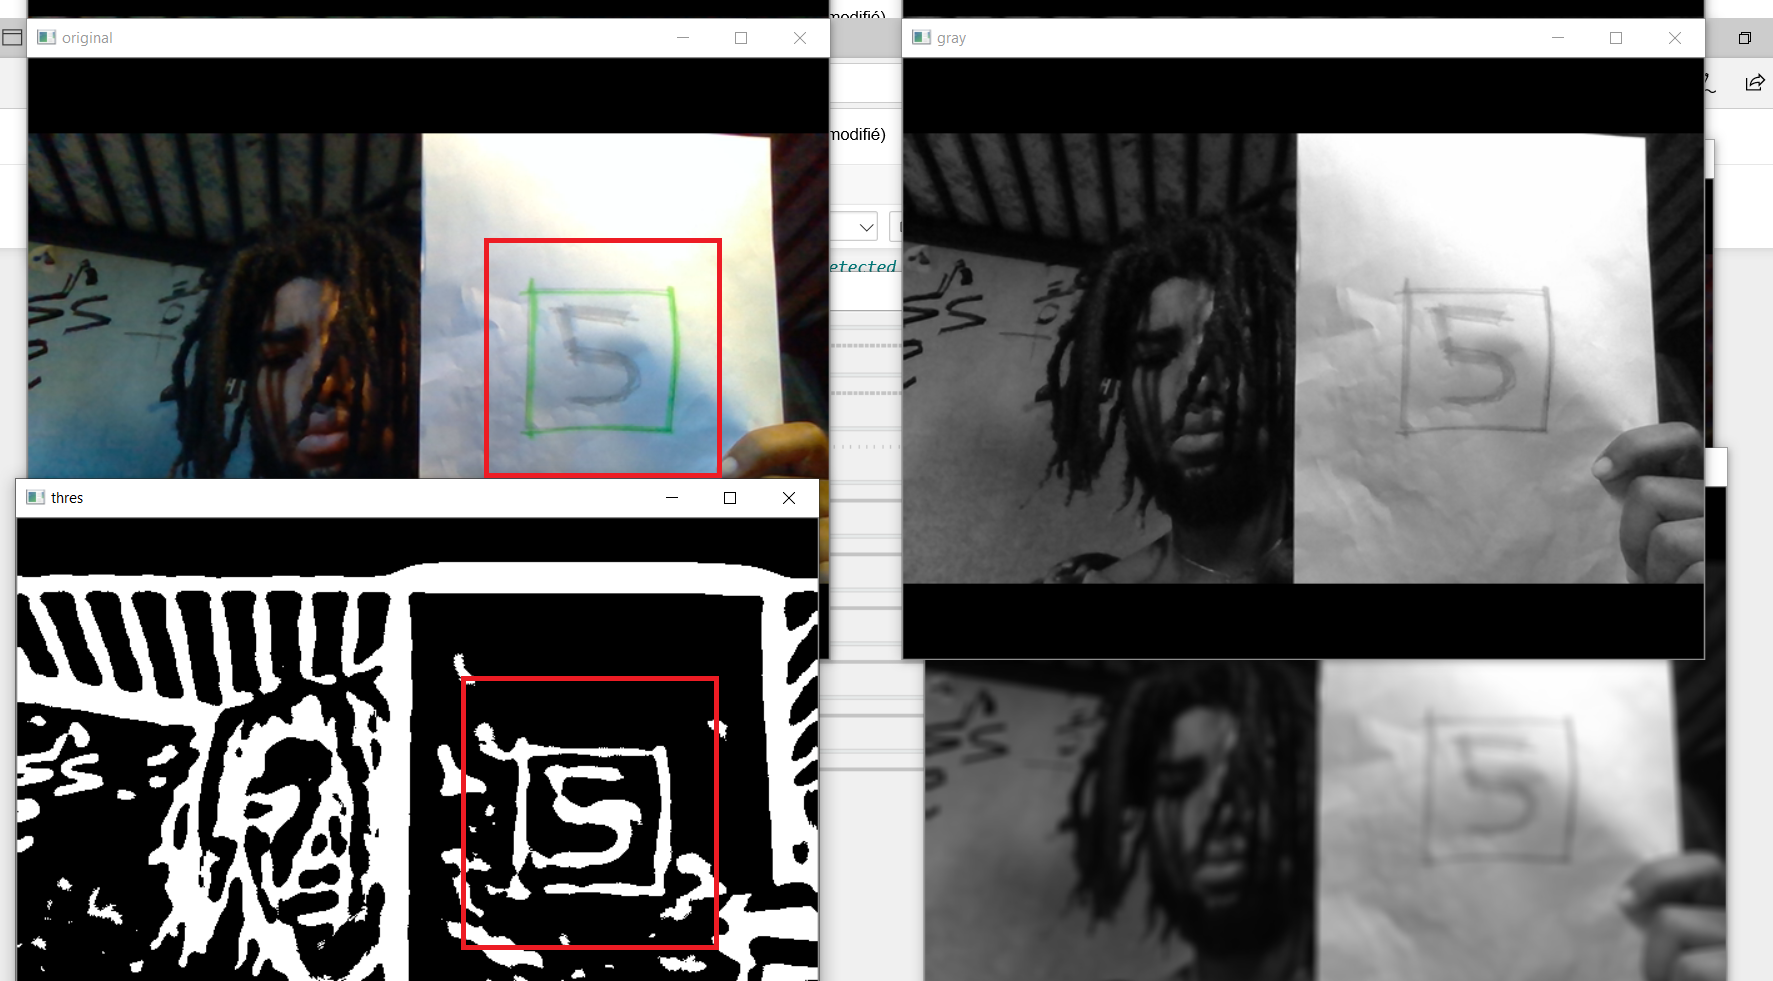<br>


<div align="center">
    <i>The original frame is converted into grayscale, then blurred for removing noise for the future thresholding.</i>
</div> 

<br>
<br>
<br>
_______________________________________________________________________________________________________________________________

## - 2ND STEP - DRAWING CONTOURS:

#### Binary Thresholding
Binary Thresholding works by defining a pixel intensity as a threshold, all pixels above that value is white, and all the pixels above is black.
Binary thresholding doesn't seems ideal for video processing, because light tend to change a lot over frames. <br>
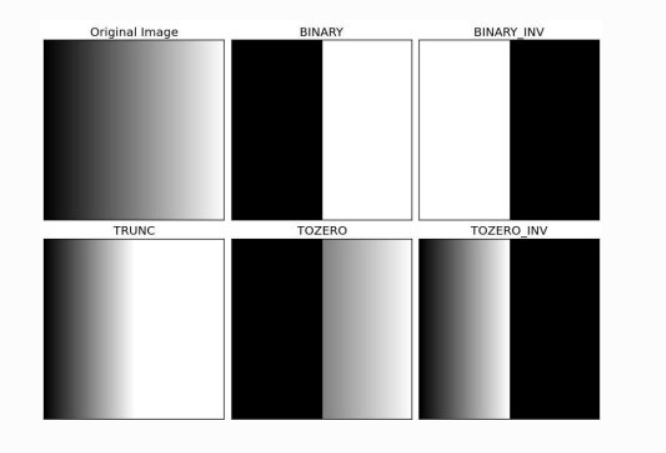<br>


#### Adaptive Thresholding
The Adaptive threshold works better with variable light source. It takes into account the adjacent pixels during the process. <br>
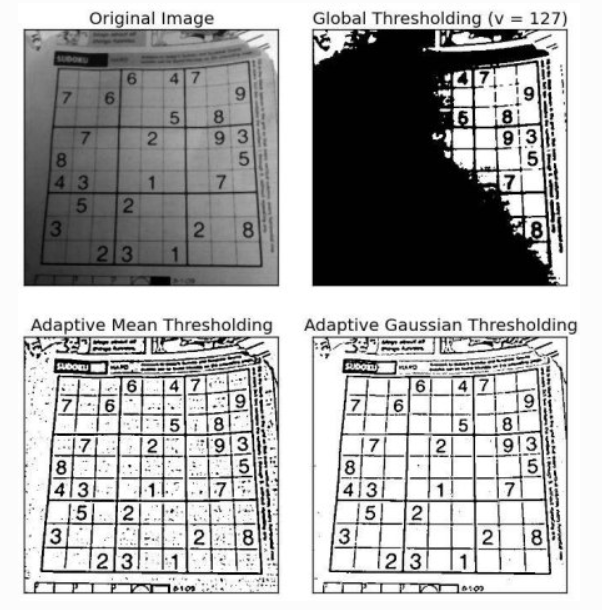 <br>

#### Contours
Contours is used on binary image to define the edge of the Region Of Interest (ROI), it allow us to detect points coordinates around the binary object. From those coordinates we can draw the edges by linking those points. <br>
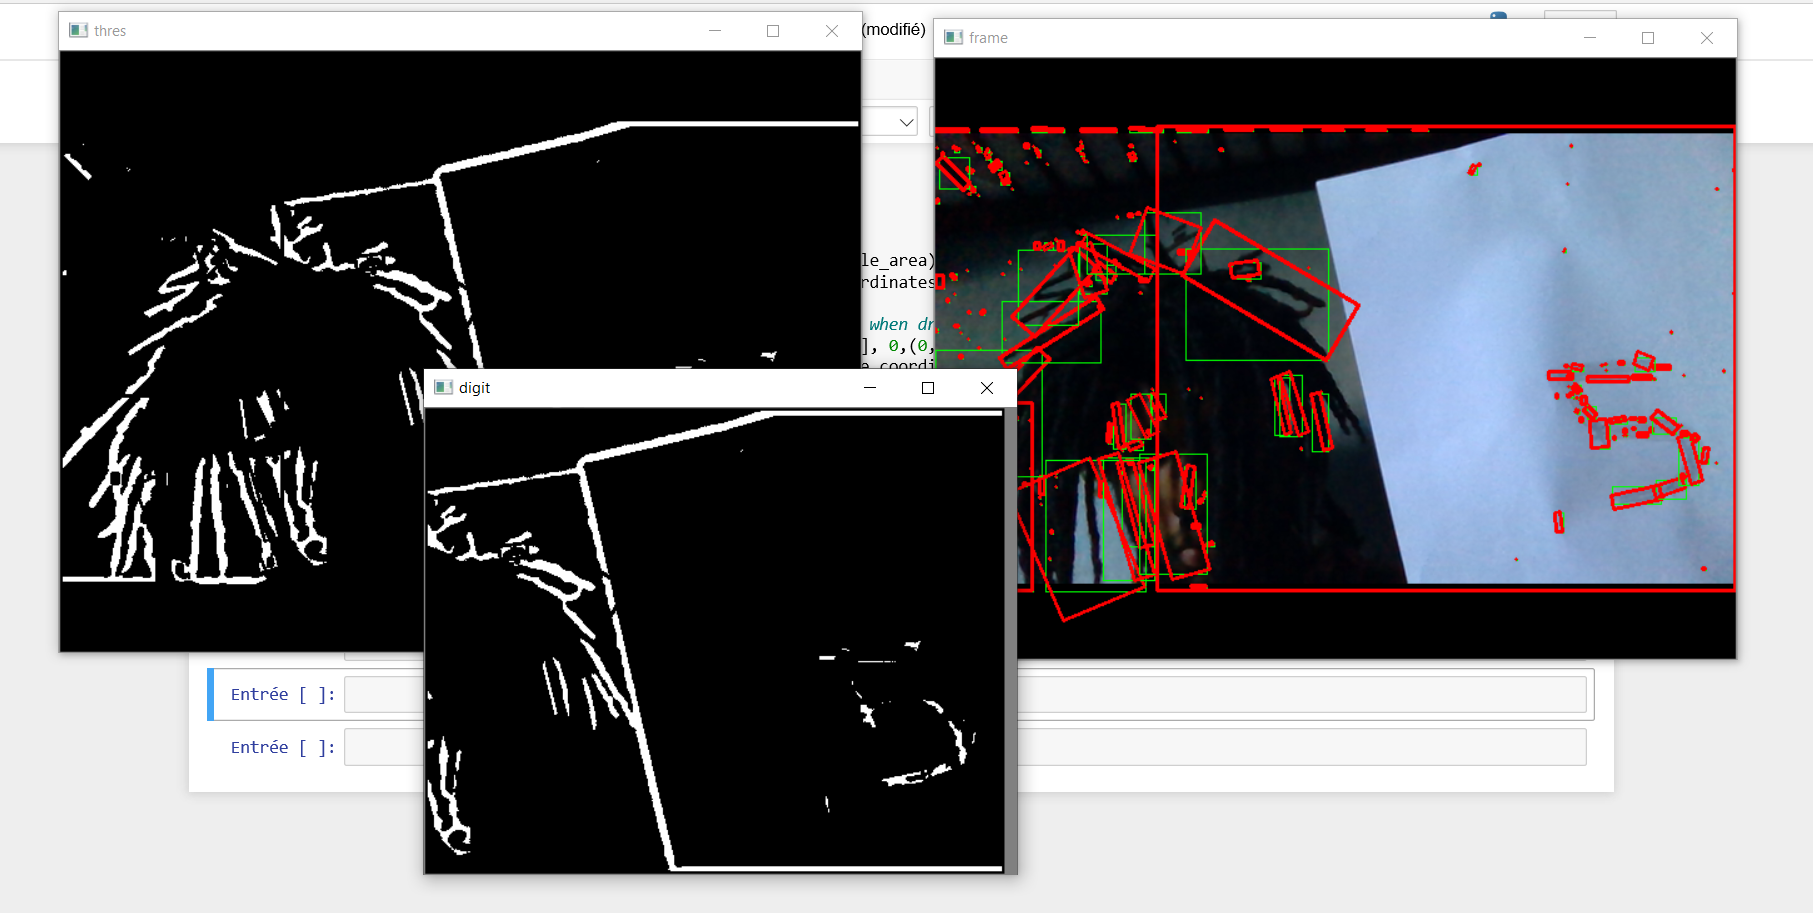

<br>
<br>
<br>

_______________________________________________________________________________________________________________________________

## - 3ND STEP - REDUCING NOISE:
As we can see, there is too much noise to detect only the digit drawn on the sheet. By using **if conditions**, the **length** of the bounding box rectangle *(represented by the yellow numbers on the frame)*, and the **area** cover by the bounding box *(represented by the white numbers)*, we are able to get rid of the majority of the noise. <br>
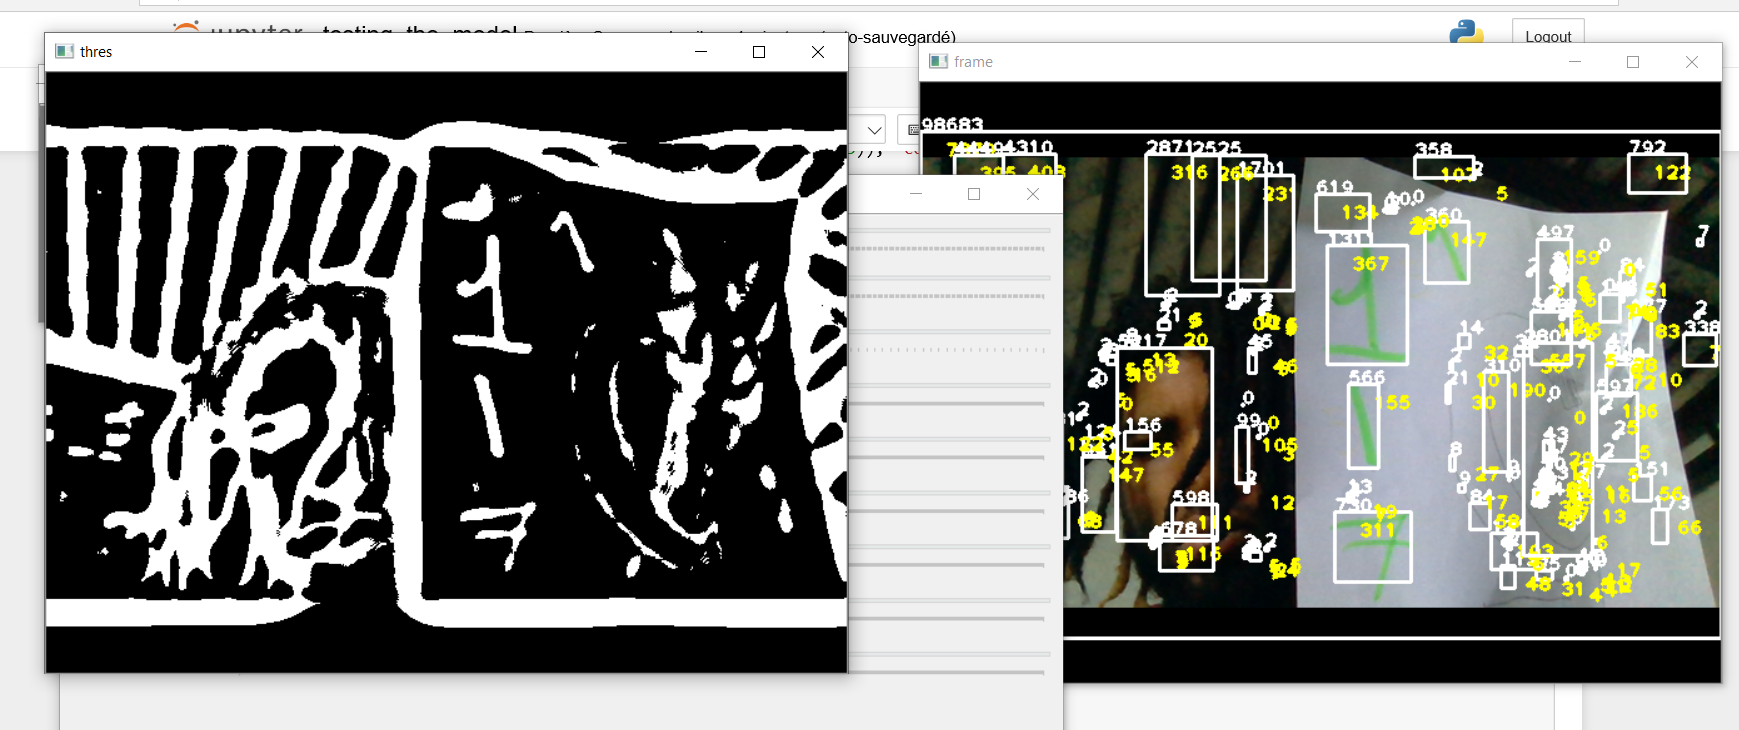 <br>

<br>
<br>
<br>

_______________________________________________________________________________________________________________________________


## FINAL STEP - MAKE PREDICTION:
<i>Note: not mentioned before, but i added limits (vertical white lines) based on the width of the screen to reduce the countours detection area. without them, big object in the background, or great pixels contrast, tend to make noise. </i>
<br>
<br>

### Here is an example of false positive: 
<br>

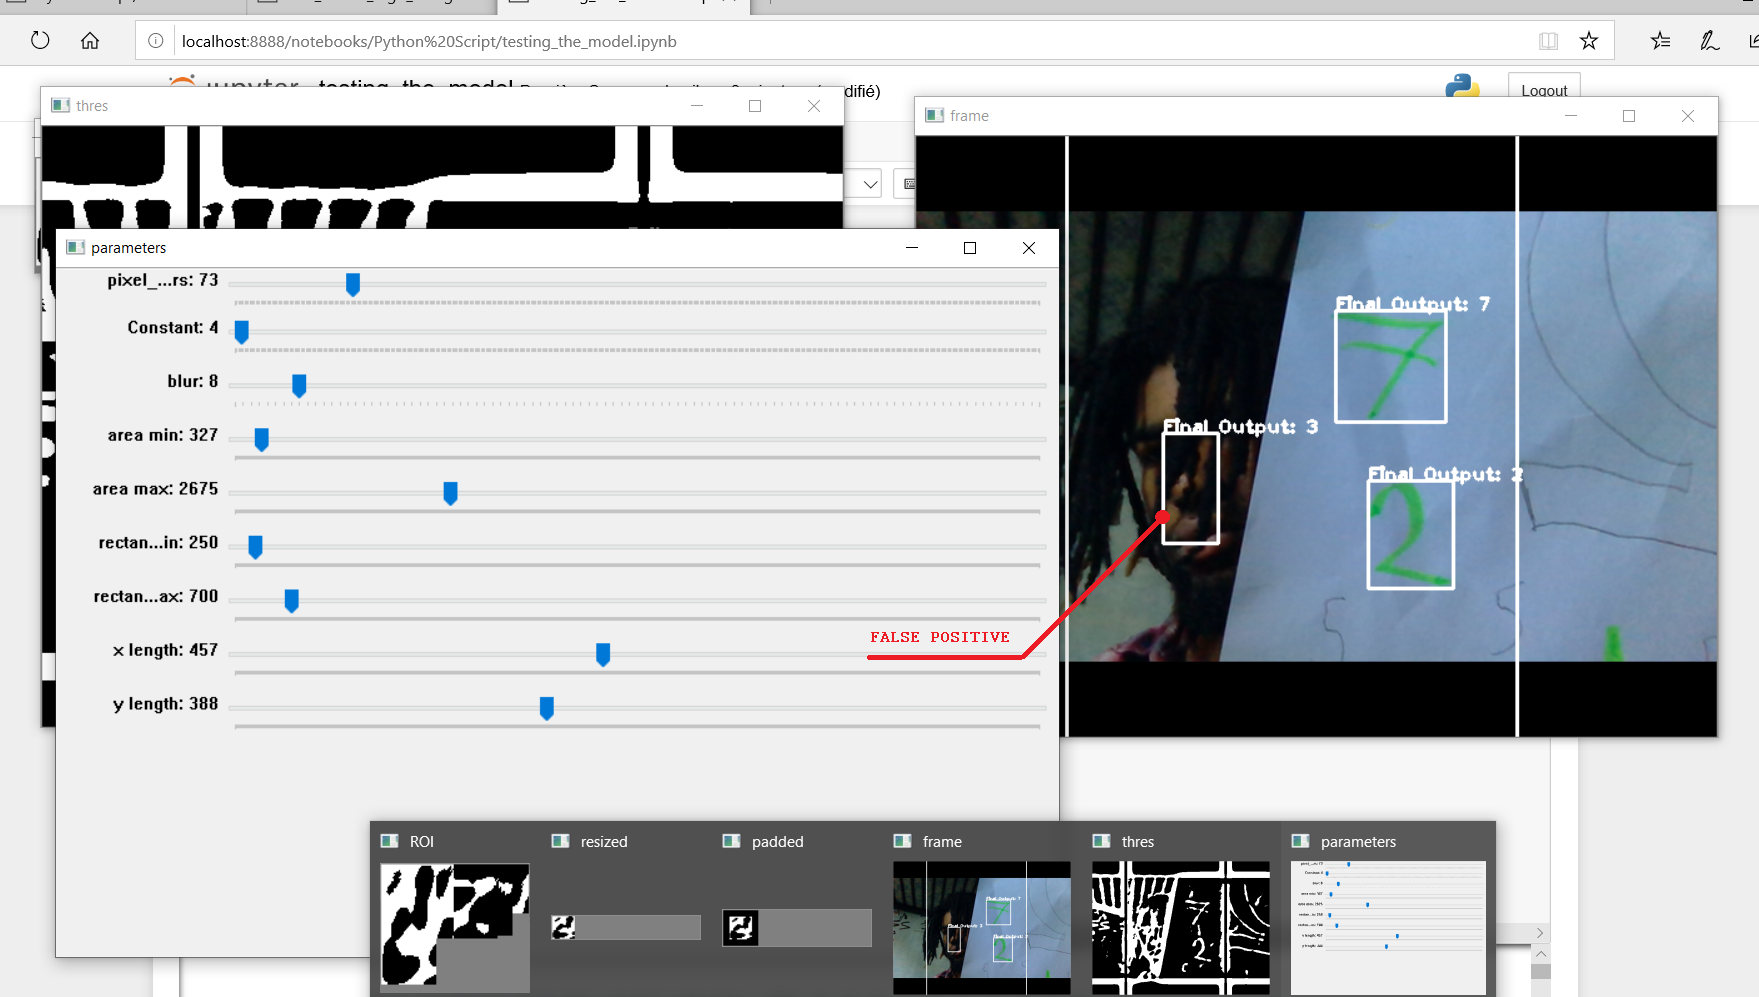
<br>

<div align="center">
    <i>
        My face is detected as a "3" by the convolutional neural network, this is due to some noise not filtered out. <br>
        Nonetheless, the number 2 and 7 has been correctly indentified.
    </i>
</div>
<br>
<br>

### Another example: 
A **"1" is drawn** on the sheet, but the algorithm predict a **final output of "7"**.  <br>
Maybe it's due to the fact that the shape of ones and sevens is kind of similar, we could maybe train the model with more data from the MNIST dataset *(a sub-sample of 10 000 images was used to train this model)*, but simply add an horizontal line to the bottom of the "1" seems sufficient enough, to make the difference between those to two digits.
<br>
<br>

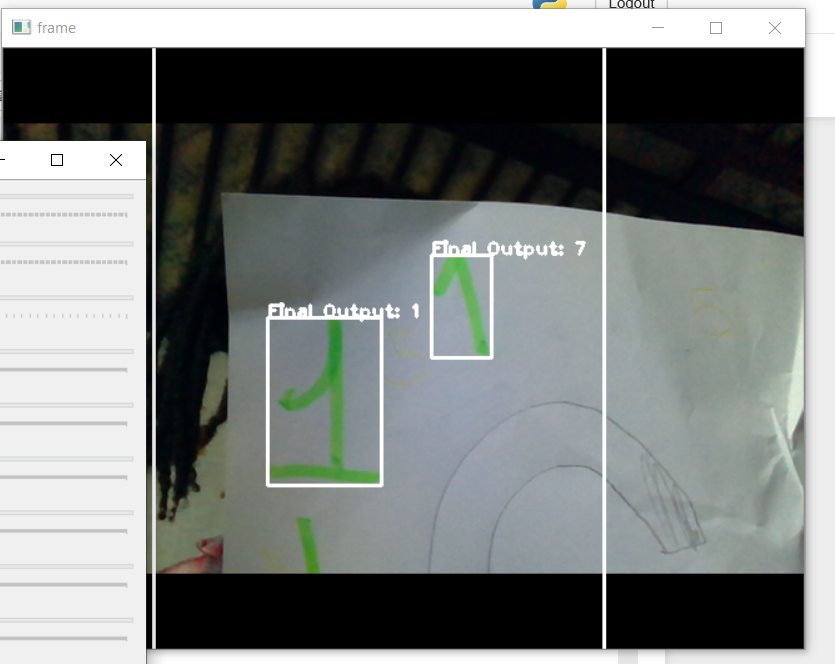 
<br>
<br>
